# Coeficiente de reflexión por incidencia oblicua entre fluidos sobre superficies piramidales
## (Siguiendo a Kinsler, Fundamentos de Acústica, pag. 184 en el cap. 6)

En cada incidencia sobre la pared de la pirámide el ángulo de incidencia (respecto la normal) debe ser menor al ángulo critico dado por la relación:

$$sen(\theta_c) = \frac{c_1}{c_2}$$

En la ecuación anterior $c_1$ y $c_2$ son las velocidades de propagación de los dos medios considerados. En caso de que el ángulo sea superior tendremos reflexión total y no habrá atenuación correspondiente a la transmisión en ese punto. Por lo tanto

$$\theta_{imax} = \theta_c$$

Esto de alguna manera condiciona el ángulo máximo que puede tener la pirámide, ya que si suponemos que el transductor que emite se posiciona perpendicularmente sobre ella inciden con un ángulo 90°- $\theta_i$ y el ángulo del extremo de la pirámide será el doble de este, o sea 2(90°- $\theta_i$). Dado que en esta condición la trasmisión es prácticamente nula, lo conveniente es que la pirámide tenga un ángulo bastante más pequeño que este. ¿Cuánto más pequeño? Lo vemos analizando el coeficiente de reflexión.

El coeficiente de reflexión $R$ para la amplitud en cada uno de los puntos en que se refleja la radiación está dado por:

$$R=\cfrac{r_2/r_1-cos(\theta_t)/cos(\theta_i)}{r_2/r_1+cos(\theta_t)/cos(\theta_i)}$$

En la ecuación anterior $\theta_t$ y $\theta_i$ son respectivamente el ángulo de transmisión y el de incidencia, siendo $r_1$ y $r_2$ las impedancias ac´suticas especificas de cada uno de los medios:

$$r_1=\rho_1 c_1 \text{, } r_2=\rho_2 c_2 \text{  donde } \rho_1 \text{ y } \rho_2 \text{  son densidades}$$

Dado que necesitamos una relación entre los ángulos de incidencia y de transmisión, lo podemos hacer de la siguiente manera:

$$ cos(\theta_t = \sqrt{1-sen^2(\theta_t)}=\sqrt{1-(c_2/c_1)^2sin^2(\theta_i)}$$

Reemplazando en la ecuación anterior obtenemos el coeficiente de reflexión en función de $\theta_i$

$$R=\cfrac{r_2/r_1-\sqrt{1-(c_2/c_1)^2sin^2(\theta_i)}/cos(\theta_i)}{r_2/r_1+\sqrt{1-(c_2/c_1)^2sin^2(\theta_i)}/cos(\theta_i)}$$

A continuación se presenta el codigo en Python para realizar dicho cálculo en función de la caracteristica de los medios de propagación:

En primer lugar se cargan las librerias:

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Se define la función que realiza el cálculo:

In [24]:
def abs_piramidales (c1, rho1, c2, rho2, ang_pir):
    """ Devuelve el coeficiente de reflexión de Rayleigh"""
    
    r1 = rho1 * c2
    r2 = rho2 * c2

    theta_c = 1 / np.sin(c1 / c2)
    theta_i_max = (theta_c * 180) / np.pi
    theta_i_perpendicular = 90 - ang_pir / 2
    
    theta_i = np.arange(0,theta_i_max) * np.pi / 180
  
    aux_r = r2 / r1
    aux_c = c2 / c1
    aux_theta_t = np.sqrt(np.absolute(1 - aux_c**2 * (np.sin(theta_i)**2)))
    aux_i = aux_theta_t / np.cos(theta_i)
    
    R = abs((aux_r - aux_i) / (aux_r + aux_i))
    
    theta_i = theta_i * 180 / np.pi
    
    return theta_i, R, theta_i_max, theta_i_perpendicular

Se definen los medios de propagación:

In [25]:
c1 = 1450         # velocidad de propagación de: AGUA a 15°C [m/s]
rho1 = 999.19     # densidad del medio: AGUA [kg/m^3]

c2 = 1500         # velocidad de propagación de: HAM A (Precision acoustics) [m/s]
rho2 = 1110       # densidad del medio: HAM A [kg/m^3]

ang_pir = 68      # ángulo de la piramide del absorbente

theta_i, R, theta_i_max, theta_i_perpendicular = abs_piramidales(c1, rho1, c2, rho2, ang_pir)

Por ultimo se presentan los resultados:

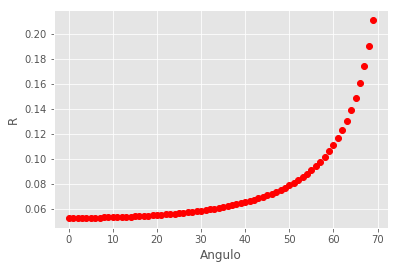

Angulo de la piramide: 68 °
Angulo critico: 69.6184716011 °
Angulo del transductor, respecto a la normal: 56.0 °


In [26]:
with plt.style.context('ggplot'):
    plt.plot(theta_i, R, 'ro')
    plt.xlabel("Angulo")
    plt.ylabel("R")
    plt.show()
    
print("Angulo de la piramide:", ang_pir, "°" )
print("Angulo critico:", theta_i_max, "°" )
print("Angulo del transductor, respecto a la normal:", theta_i_perpendicular, "°")

**Referencia**

* Kinsler LE, Frey AB, Sanders AR, Kinsler JV. Fundamentos de acústica. 1992.

**Colaboración**
* Sergio N. Gwirc

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">